In [1]:
from processing_comisiones import process_comissions_df
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram
import plotly.graph_objects as go
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = process_comissions_df()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211493 entries, 0 to 211492
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   EDAD                     211493 non-null  int64 
 1   PLAN DE LA POLIZA        211493 non-null  object
 2   MODALIDAD DE LA POLIZA   211493 non-null  object
 3   MONEDA                   211493 non-null  object
 4   ENTIDAD                  211493 non-null  object
 5   SEXO                     211493 non-null  object
 6   FORMA DE VENTA           211493 non-null  object
 7   TIPO DIVIDENDO           211493 non-null  object
 8   NUMERO DE ASEGURADOS     211493 non-null  int64 
 9   PRIMA CEDIDA             211493 non-null  int64 
 10  COMISIONES DIRECTAS      211493 non-null  int64 
 11  FONDO DE INVERSIÓN       211493 non-null  int64 
 12  FONDO DE ADMINISTRACION  211493 non-null  int64 
 13  MONTO DE DIVIDENDOS      211493 non-null  int64 
 14  MONTO DE RESCATE    

In [3]:
cols = ['NUMERO DE ASEGURADOS', 'PRIMA CEDIDA', 'COMISIONES DIRECTAS', 'FONDO DE INVERSIÓN', 'FONDO DE ADMINISTRACION', 'MONTO DE DIVIDENDOS', 'MONTO DE RESCATE']
X = df[cols]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)

labels = kmeans.labels_

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [4]:
df.describe()

,EDAD,NUMERO DE ASEGURADOS,PRIMA CEDIDA,COMISIONES DIRECTAS,FONDO DE INVERSIÓN,FONDO DE ADMINISTRACION,MONTO DE DIVIDENDOS,MONTO DE RESCATE,PLAN DE LA POLIZA_Dotal Mixto,PLAN DE LA POLIZA_Dotal Puro,...,FORMA DE VENTA_Internet,FORMA DE VENTA_Módulos de Venta,FORMA DE VENTA_Otra Forma de Venta,FORMA DE VENTA_Otros Canales de Venta Masiva,FORMA DE VENTA_Red de Sucursales Bancarias,FORMA DE VENTA_Telemercadeo,TIPO DIVIDENDO_Experiencia Siniestralidad Global,TIPO DIVIDENDO_Experiencia Siniestralidad Propia,TIPO DIVIDENDO_Experiencia Tasa Financiera,TIPO DIVIDENDO_Sin dividendo
count,211493.00,211493.00,211493.00,211493.00,211493.00,211493.00,211493.00,211493.00,211493.00,211493.00,...,211493.00,211493.00,211493.00,211493.00,211493.00,211493.00,211493.00,211493.00,211493.00,211493.00
mean,47.71,87.81,11429.07,62709.00,1892111.43,247409.62,8.88,291495.93,0.26,0.00,...,0.03,0.00,0.03,0.03,0.13,0.01,0.00,0.10,0.04,0.85
std,18.95,1003.38,90114.34,295899.94,15590646.68,2540255.09,9581.76,2557418.35,0.44,0.06,...,0.16,0.03,0.16,0.18,0.34,0.12,0.02,0.31,0.20,0.36
min,0.00,1.00,-433300.00,-1071441.00,-3685.00,-4670935.00,-3877252.00,-2382435.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,34.00,2.00,0.00,75.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
50%,48.00,6.00,0.00,3422.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
75%,61.00,31.00,508.00,23650.00,2533.00,714.00,0.00,10570.00,1.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
max,121.00,82730.00,7768377.00,16474728.00,1300351438.00,315158398.00,2024442.00,320630241.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [5]:
stats = df.describe(include='all')
print(stats)
print(df.columns)

           EDAD  NUMERO DE ASEGURADOS  PRIMA CEDIDA  COMISIONES DIRECTAS  \
count 211493.00             211493.00     211493.00            211493.00   
mean      47.71                 87.81      11429.07             62709.00   
std       18.95               1003.38      90114.34            295899.94   
min        0.00                  1.00    -433300.00          -1071441.00   
25%       34.00                  2.00          0.00                75.00   
50%       48.00                  6.00          0.00              3422.00   
75%       61.00                 31.00        508.00             23650.00   
max      121.00              82730.00    7768377.00          16474728.00   

       FONDO DE INVERSIÓN  FONDO DE ADMINISTRACION  MONTO DE DIVIDENDOS  \
count           211493.00                211493.00            211493.00   
mean           1892111.43                247409.62                 8.88   
std           15590646.68               2540255.09              9581.76   
min            

In [6]:
for col in cols:
    print(f'Estadística descriptiva para la columna "{col}":')
    print(df[col].describe())
    print('\n')

Estadística descriptiva para la columna "NUMERO DE ASEGURADOS":
count   211493.00
mean        87.81
std       1003.38
min          1.00
25%          2.00
50%          6.00
75%         31.00
max      82730.00
Name: NUMERO DE ASEGURADOS, dtype: float64


Estadística descriptiva para la columna "PRIMA CEDIDA":
count    211493.00
mean      11429.07
std       90114.34
min     -433300.00
25%           0.00
50%           0.00
75%         508.00
max     7768377.00
Name: PRIMA CEDIDA, dtype: float64


Estadística descriptiva para la columna "COMISIONES DIRECTAS":
count     211493.00
mean       62709.00
std       295899.94
min     -1071441.00
25%           75.00
50%         3422.00
75%        23650.00
max     16474728.00
Name: COMISIONES DIRECTAS, dtype: float64


Estadística descriptiva para la columna "FONDO DE INVERSIÓN":
count       211493.00
mean       1892111.43
std       15590646.68
min          -3685.00
25%              0.00
50%              0.00
75%           2533.00
max     1300351438.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211493 entries, 0 to 211492
Data columns (total 80 columns):
 #   Column                                                Non-Null Count   Dtype
---  ------                                                --------------   -----
 0   EDAD                                                  211493 non-null  int64
 1   NUMERO DE ASEGURADOS                                  211493 non-null  int64
 2   PRIMA CEDIDA                                          211493 non-null  int64
 3   COMISIONES DIRECTAS                                   211493 non-null  int64
 4   FONDO DE INVERSIÓN                                    211493 non-null  int64
 5   FONDO DE ADMINISTRACION                               211493 non-null  int64
 6   MONTO DE DIVIDENDOS                                   211493 non-null  int64
 7   MONTO DE RESCATE                                      211493 non-null  int64
 8   PLAN DE LA POLIZA_Dotal Mixto                         211493 non

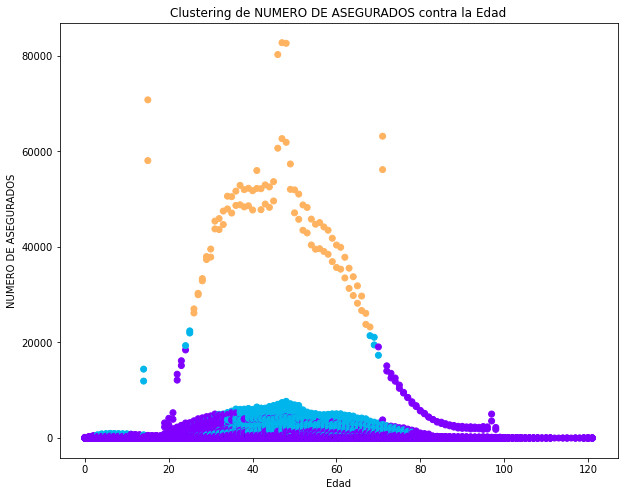

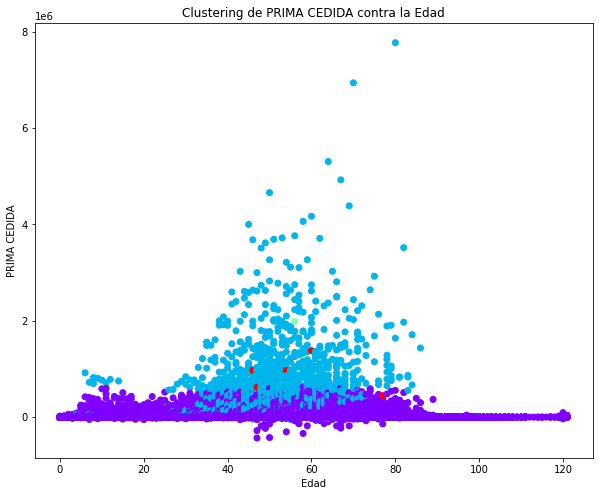

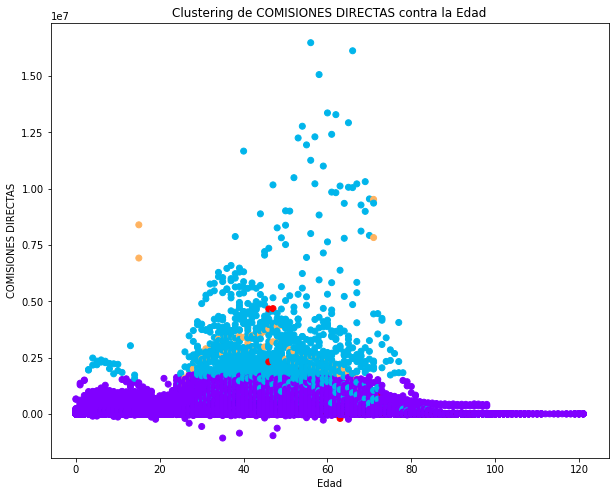

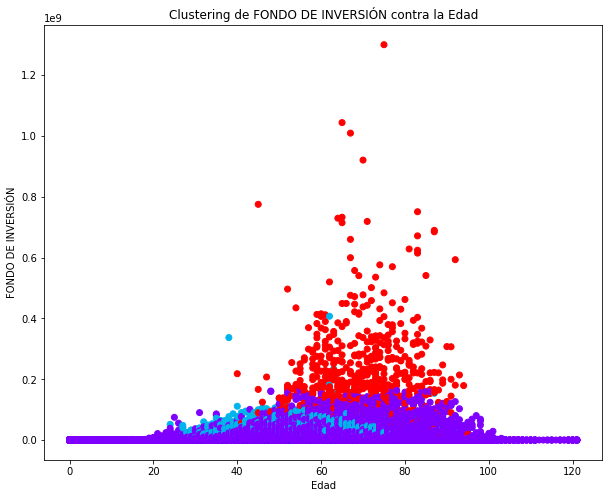

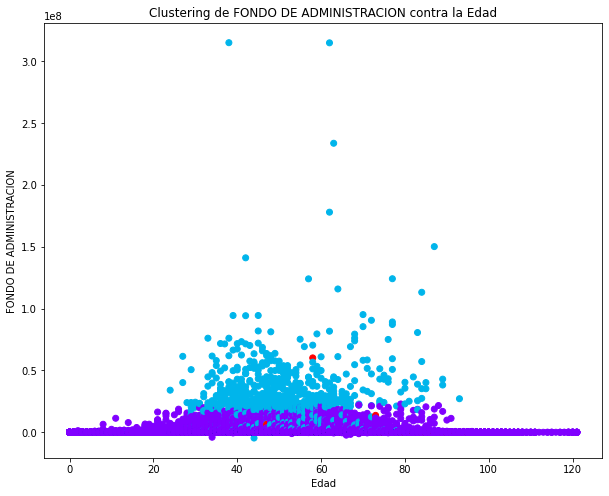

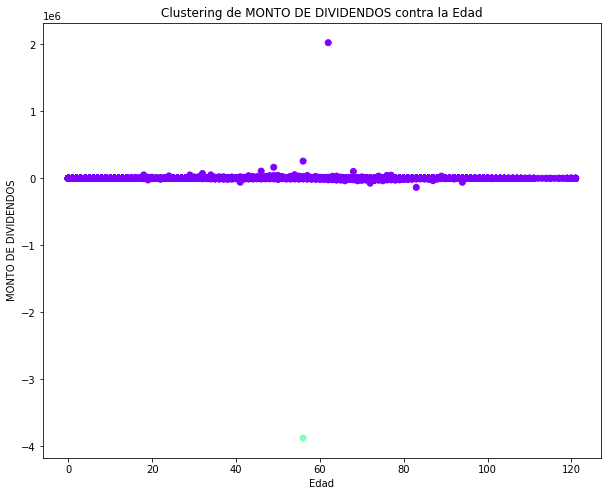

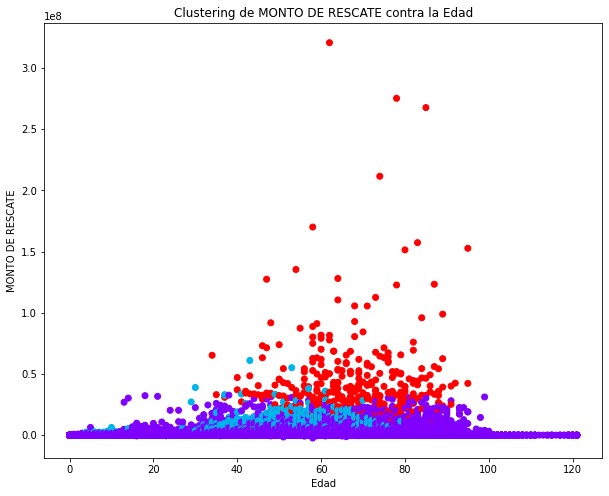

In [8]:
for col in cols:
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.scatter(df['EDAD'], df[col], c=labels, cmap='rainbow')
    ax.set_xlabel('Edad')
    ax.set_ylabel(col)
    ax.set_title(f'Clustering de {col} contra la Edad')
    plt.show()

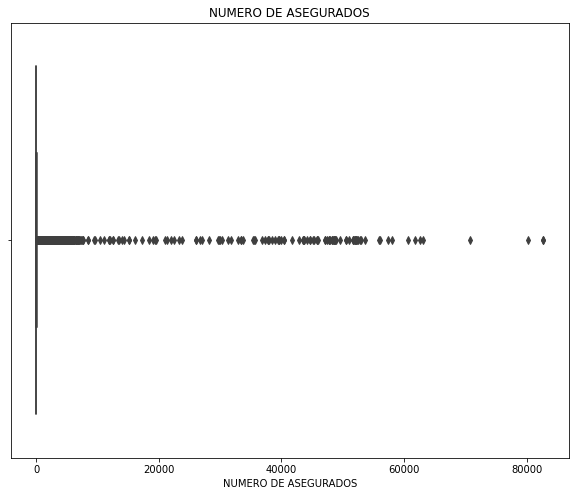

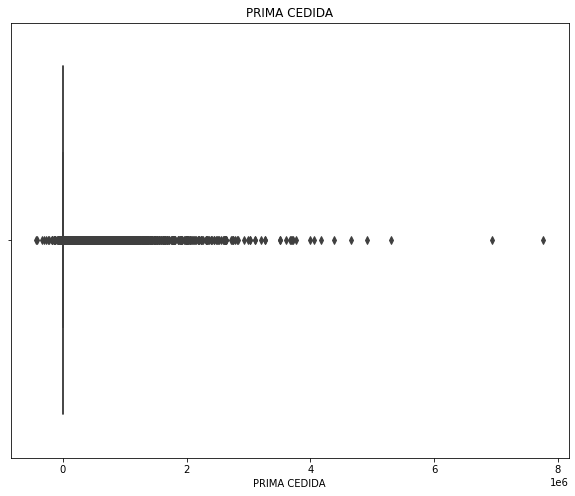

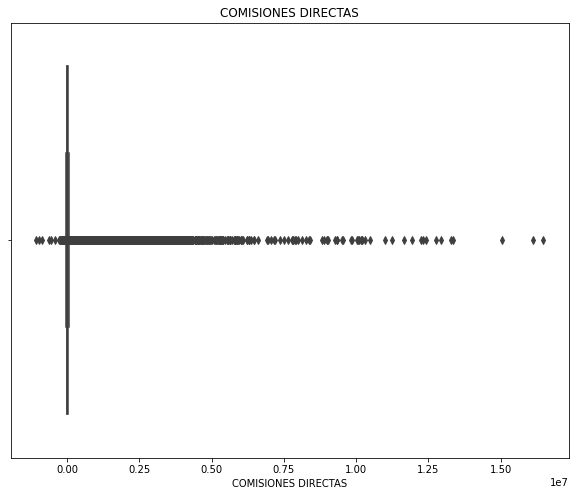

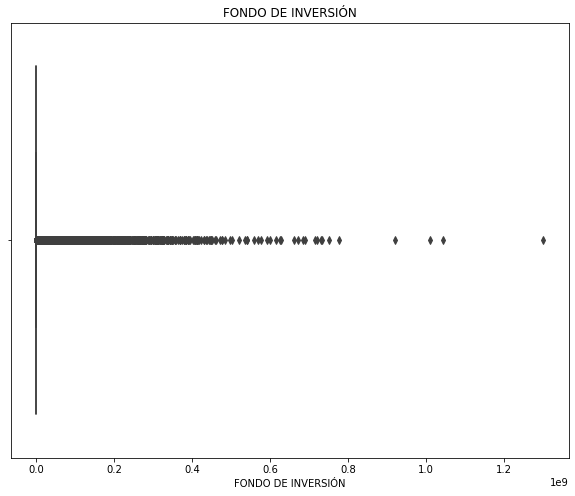

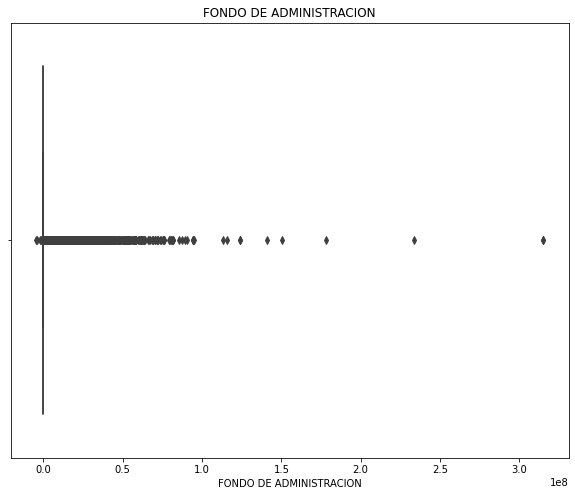

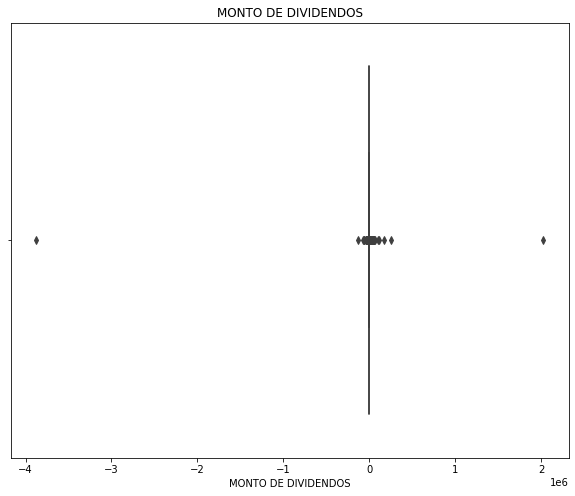

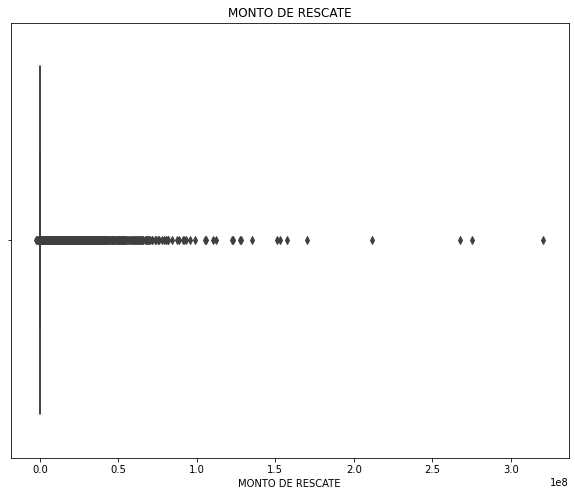

In [9]:
for col in cols:
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.boxplot(x=df[col], ax=ax)
    ax.set_title(col)
    plt.show()

In [11]:
cols = pd.DataFrame(cols)